In [1]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.tri as tri
import datetime 
import time
#import netcdftime
import sys
import glob
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import os
from scipy.interpolate import griddata
import csv
#from mpl_toolkits.basemap import Basemap
from scipy import interpolate
import xarray as xr
import seaborn as sns

In [ ]:
def get_data(len_data, NU_WU):  #len_data is the number of files i want to read in (e.g. 4 for 4h hourly data), NU_WU is a str and you can define if you want 'with urban' or 'no urban'
    ds_data = {}  
    for i in range(1, len_data + 1):
        filename = f'../det_data_all_2021/fc_DOM01_0{i:03d}_{NU_WU}_urban_grid.nc'
        try:
            ds_data[i] = xr.open_dataset(filename)
        except FileNotFoundError:
            print(f'File not found: {filename}')
        except Exception as e:
            print(f'An error occurred while opening {filename}: {e}')
    
    return ds_data


In [ ]:
data_WU_det = get_data(120, 'WU')
data_NU_det = get_data(120, 'NU')

In [2]:
base_path = '/data/hubhome/s6mabohm/Masterarbeit/BL_height_data/'
file_template = 'fc_DOM01_00{}_grid_{}_urban.nc'

time_steps = ['09', '10', '11', '12', '13', '14', '15', '16', '17']
dataset_types = ['OPR22', 'URB22']

ds = {'OPR22': {}, 'URB22': {}}

for time_step in time_steps:
    for dataset_type in dataset_types:
        file_path = base_path + file_template.format(time_step, dataset_type)
        ds[dataset_type][time_step] = xr.open_dataset(file_path)


In [3]:
c = 0.28571  

for dataset_type in dataset_types:
    for time_step in time_steps:
        current_ds = ds[dataset_type][time_step]
        current_ds['theta'] = current_ds['T'] * (current_ds['PMSL'] / current_ds['P']) ** c


In [4]:
sns.set_style("whitegrid")

In [5]:
#open height level file

hhl_file = xr.open_dataset("/data/hubhome/s6mabohm/Masterarbeit/hhl.nc")
hhl = hhl_file.variables["HHL"][0,:,:]#[::-1]
hhl_f = hhl
### Full levels: because the levels are defined at half levels, it is corrected here
for k in range(1,hhl.shape[0]):
    hhl_f[k,:] = hhl[k,:] + (hhl[k,:]-hhl[k-1,:])/2


/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/xarray/coding/times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects ins

In [6]:
height = []

for i in range(120):
    b = hhl_f[i, 74].values
    height.append(b)

height = np.stack(height)
#print(height)
len(height)

120

In [7]:
ds['URB22']['17'].T_WML_LK.isel(cell=74).values

array([277.13046], dtype=float32)

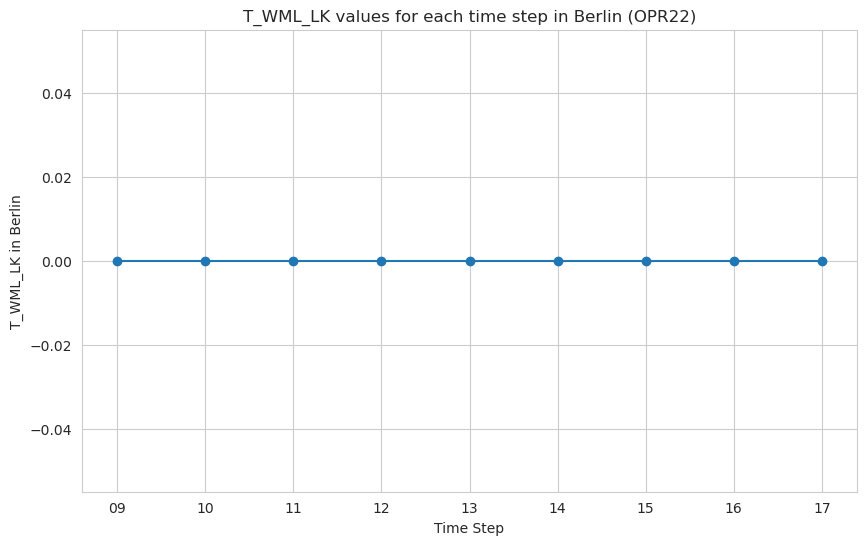

In [8]:
t_values = []
for time_step in time_steps:
    t_values.append(ds['OPR22'][time_step].H_ML_LK.isel(cell=70).values)

plt.figure(figsize=(10, 6))
plt.plot(time_steps, t_values, marker='o')
plt.xlabel('Time Step')
plt.ylabel('T_WML_LK in Berlin')
plt.title('T_WML_LK values for each time step in Berlin (OPR22)')
plt.grid(True)
plt.show()

In [9]:
ds['URB22']['10'].QV.isel(cell=50).values

array([[3.99426699e-06, 3.98444354e-06, 3.98057091e-06, 3.97311896e-06,
        3.94286781e-06, 3.86915372e-06, 3.82974849e-06, 3.82497274e-06,
        3.81743757e-06, 3.75985064e-06, 3.66719610e-06, 3.63800541e-06,
        3.60844138e-06, 3.58513671e-06, 3.55149746e-06, 3.50300547e-06,
        3.42490716e-06, 3.38490872e-06, 3.35011964e-06, 3.28509918e-06,
        3.23803283e-06, 3.22403525e-06, 3.17269314e-06, 3.14598378e-06,
        3.09255074e-06, 3.01610930e-06, 2.99376393e-06, 2.95054292e-06,
        2.93725725e-06, 2.92182108e-06, 2.83193435e-06, 2.78853258e-06,
        2.75009279e-06, 2.62284107e-06, 2.59758735e-06, 2.57068587e-06,
        2.57795409e-06, 2.60943534e-06, 2.60095590e-06, 2.56043654e-06,
        2.49886307e-06, 2.49270988e-06, 2.47931348e-06, 2.46080867e-06,
        2.43200657e-06, 2.42124861e-06, 2.43198679e-06, 2.44164266e-06,
        2.42531792e-06, 2.38778853e-06, 2.36049254e-06, 2.29535567e-06,
        2.23978168e-06, 2.22657627e-06, 2.23252482e-06, 2.277191

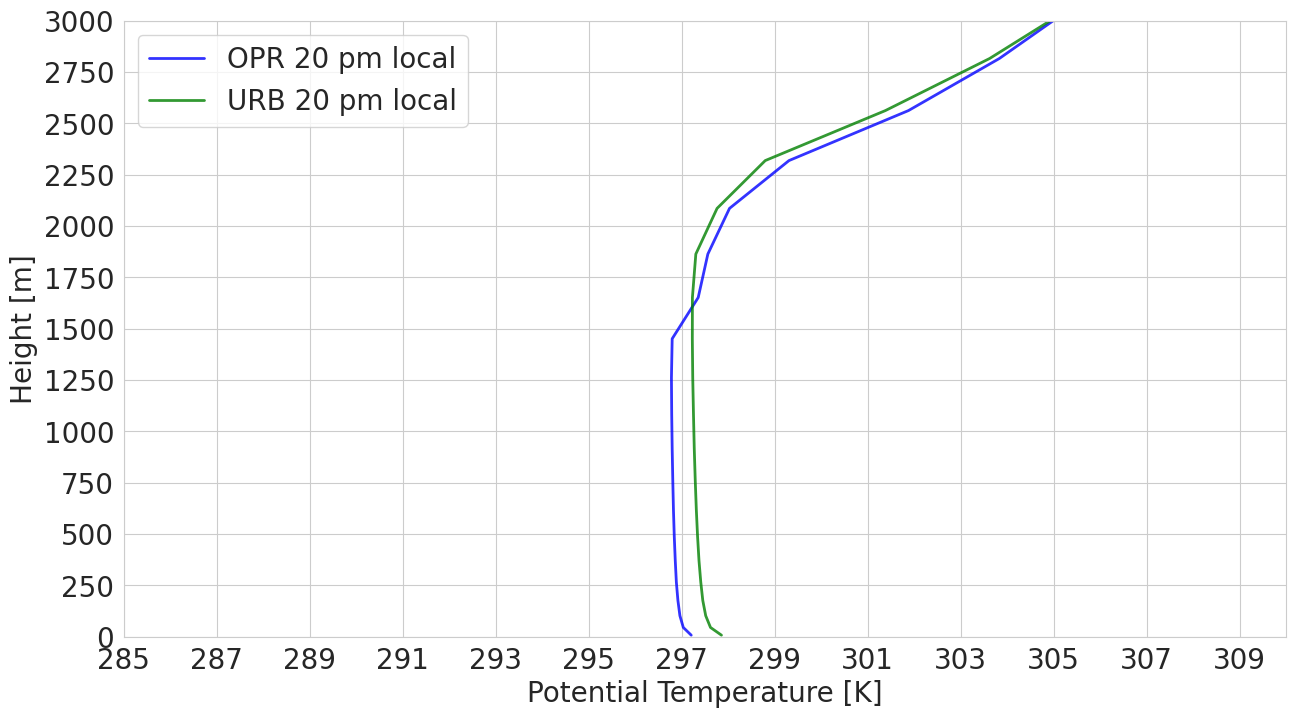

In [10]:
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(15, 8))
#ax.plot(ds['OPR22']['13'].theta.isel(cell=74).values[0], height , label='OPR 2 am local', color='#BF2C23', lw = 2)
#ax.plot(ds['URB22']['13'].theta.isel(cell=74).values[0], height, label='URB 2 am local', color='orange', lw = 2)

# ax.plot(ds['OPR22']['09'].theta.isel(cell=74).values[0], height , label='OPR 18 pm local', color='blue', lw = 2)
# ax.plot(ds['URB22']['09'].theta.isel(cell=74).values[0], height, label='URB 18 pm local', color='green', lw = 2)

ax.plot(ds['OPR22']['09'].theta.isel(cell=74).values[0], height , label='OPR 20 pm local', color='blue', lw = 2, alpha = .8)
ax.plot(ds['URB22']['09'].theta.isel(cell=74).values[0], height, label='URB 20 pm local', color='green', lw = 2, alpha = .8)

# ax.plot(ds['OPR22']['10'].THETA_V.isel(cell=74).values[0], height , label='OPR 20 pm local', color='red', lw = 2, alpha = .8)
# ax.plot(ds['URB22']['10'].THETA_V.isel(cell=74).values[0], height, label='URB 20 pm local', color='orange', lw = 2, alpha = .8)

# ax.plot(ds['OPR22']['11'].theta.isel(cell=74).values[0], height , label='OPR 22 pm local', color='blue', lw = 2, alpha = .6)
# ax.plot(ds['URB22']['11'].theta.isel(cell=74).values[0], height, label='URB 22 pm local', color='green', lw = 2, alpha = .6)

ax.grid(True)


ax.set_ylim(0, 3000)
ax.set_yticks(range(0, 3001, 250))  

ax.set_xlim(285, 310)
ax.set_xticks(range(285, 311, 2))


ax.set_ylabel('Height [m]')
ax.set_xlabel('Potential Temperature [K]')
plt.legend()

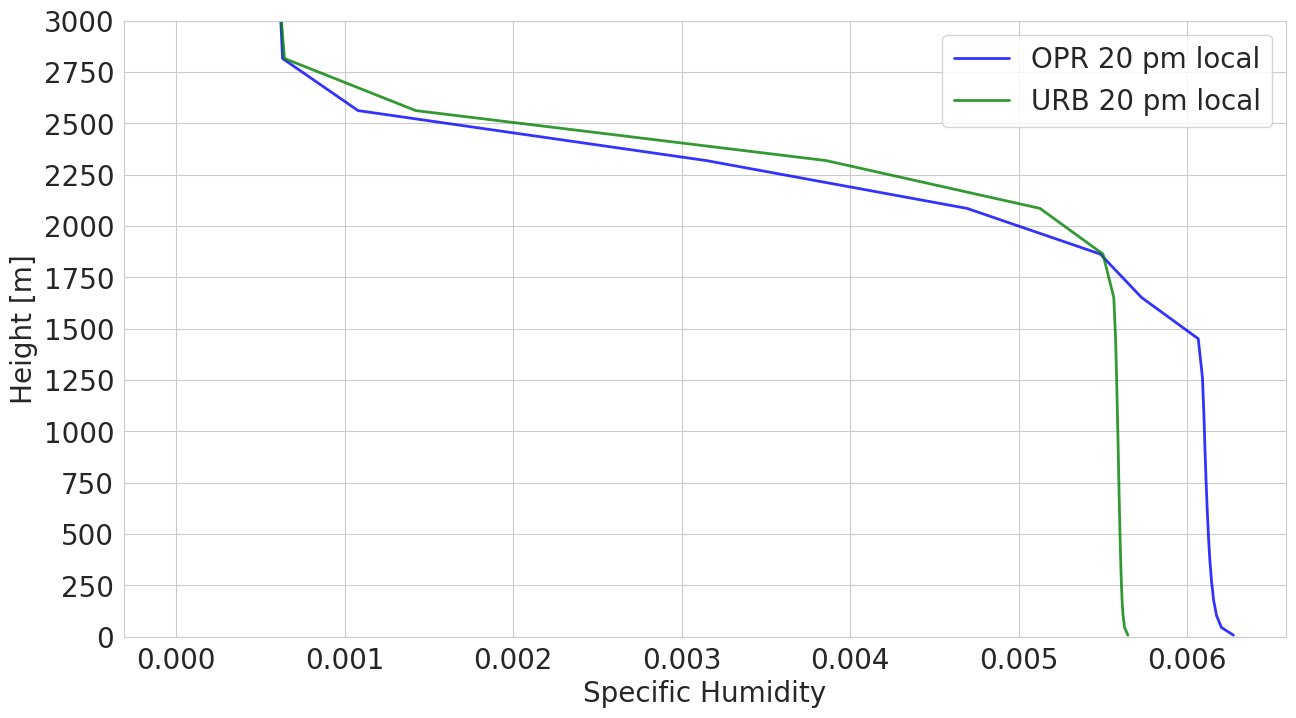

In [11]:
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(15, 8))
#ax.plot(ds['OPR22']['13'].theta.isel(cell=74).values[0], height , label='OPR 2 am local', color='#BF2C23', lw = 2)
#ax.plot(ds['URB22']['13'].theta.isel(cell=74).values[0], height, label='URB 2 am local', color='orange', lw = 2)

# ax.plot(ds['OPR22']['09'].theta.isel(cell=74).values[0], height , label='OPR 18 pm local', color='blue', lw = 2)
# ax.plot(ds['URB22']['09'].theta.isel(cell=74).values[0], height, label='URB 18 pm local', color='green', lw = 2)

ax.plot(ds['OPR22']['09'].QV.isel(cell=74).values[0], height , label='OPR 20 pm local', color='blue', lw = 2, alpha = .8)
ax.plot(ds['URB22']['09'].QV.isel(cell=74).values[0], height, label='URB 20 pm local', color='green', lw = 2, alpha = .8)

# ax.plot(ds['OPR22']['10'].THETA_V.isel(cell=74).values[0], height , label='OPR 20 pm local', color='red', lw = 2, alpha = .8)
# ax.plot(ds['URB22']['10'].THETA_V.isel(cell=74).values[0], height, label='URB 20 pm local', color='orange', lw = 2, alpha = .8)

# ax.plot(ds['OPR22']['11'].theta.isel(cell=74).values[0], height , label='OPR 22 pm local', color='blue', lw = 2, alpha = .6)
# ax.plot(ds['URB22']['11'].theta.isel(cell=74).values[0], height, label='URB 22 pm local', color='green', lw = 2, alpha = .6)

ax.grid(True)


ax.set_ylim(0, 3000)
ax.set_yticks(range(0, 3001, 250))  


ax.set_ylabel('Height [m]')
ax.set_xlabel('Specific Humidity')
plt.legend()

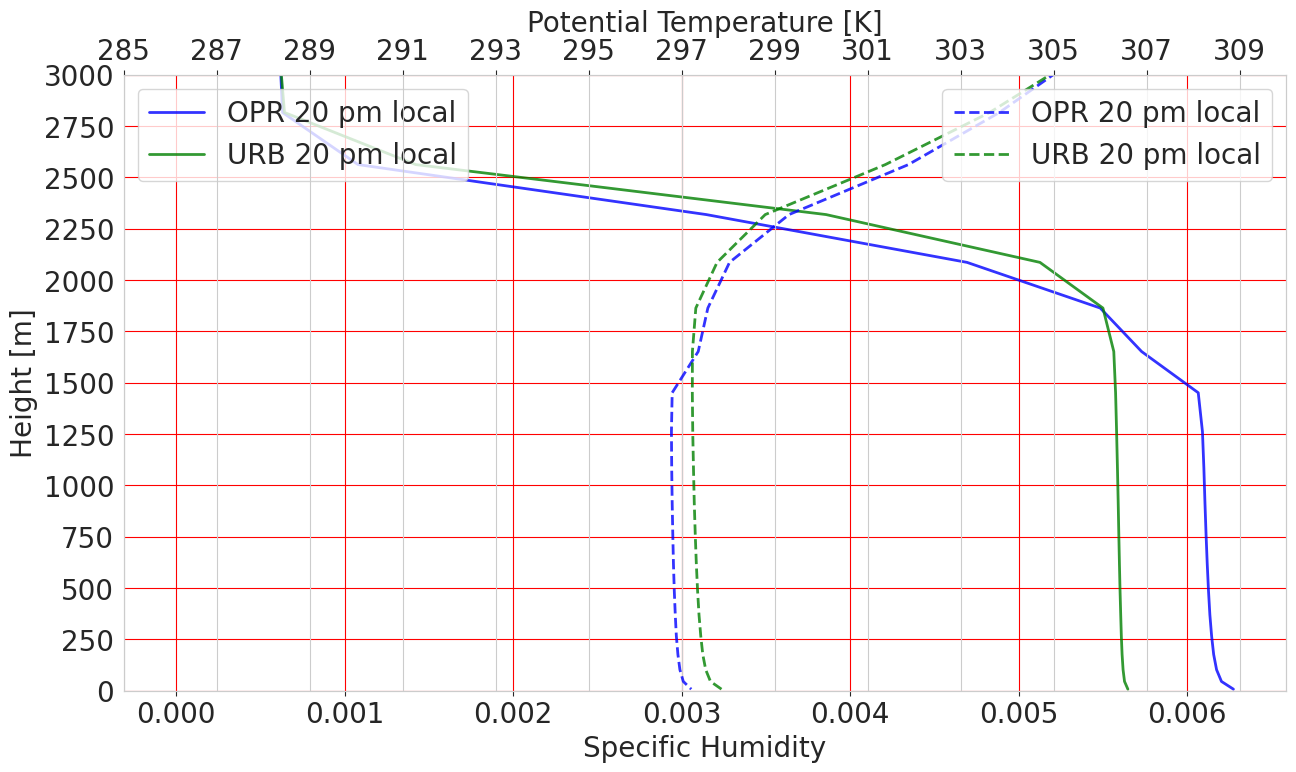

In [12]:
import matplotlib.pyplot as plt

# Set the plot parameters
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(params)

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Specific Humidity on the left y-axis
ax1.plot(ds['OPR22']['09'].QV.isel(cell=74).values[0], height, label='OPR 20 pm local', color='blue', lw=2, alpha=0.8)
ax1.plot(ds['URB22']['09'].QV.isel(cell=74).values[0], height, label='URB 20 pm local', color='green', lw=2, alpha=0.8)

# Configure the left y-axis
ax1.set_ylim(0, 3000)
ax1.set_yticks(range(0, 3001, 250))
ax1.set_ylabel('Height [m]')

ax1.set_xlabel('Specific Humidity')
ax1.grid(True, color = 'red')

# Create a second x-axis
ax2 = ax1.twiny()

# Plot Potential Temperature on the right y-axis
ax2.plot(ds['OPR22']['09'].theta.isel(cell=74).values[0], height, label='OPR 20 pm local', color='blue', lw=2, alpha=0.8, linestyle='--')
ax2.plot(ds['URB22']['09'].theta.isel(cell=74).values[0], height, label='URB 20 pm local', color='green', lw=2, alpha=0.8, linestyle='--')

# Configure the right y-axis
ax2.set_xlim(285, 310)
ax2.set_xticks(range(285, 311, 2))
ax2.set_xlabel('Potential Temperature [K]')

# Align the grids
ax1.xaxis.grid(True)
ax2.xaxis.grid(True)
ax2.yaxis.grid(False)  # Disable y-axis grid for the secondary axis

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


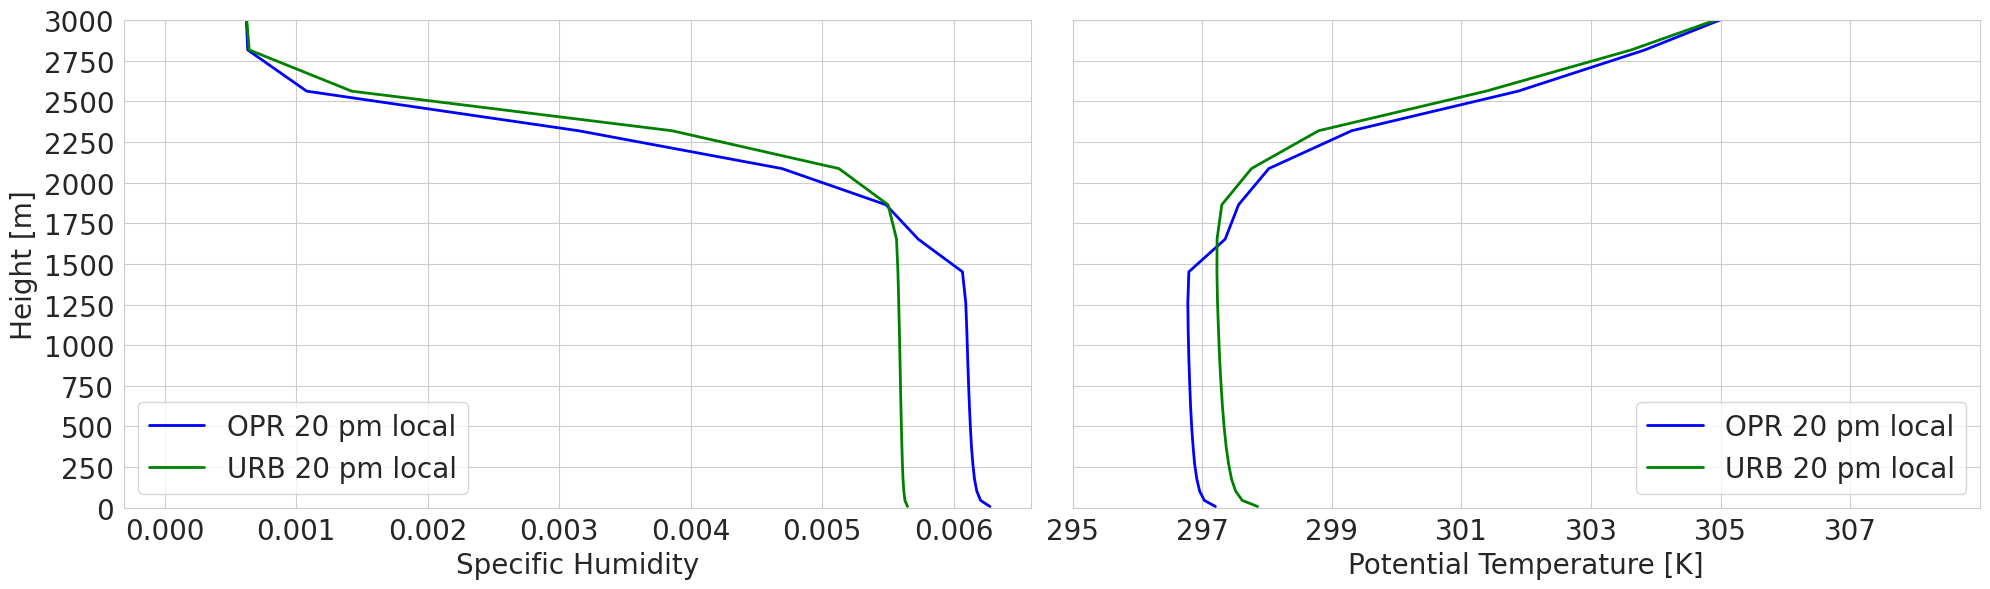

In [13]:
import matplotlib.pyplot as plt

# Set the plot parameters
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(params)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

ax1.plot(ds['OPR22']['09'].QV.isel(cell=74).values[0], height, label='OPR 20 pm local', color='blue', lw=2)
ax1.plot(ds['URB22']['09'].QV.isel(cell=74).values[0], height, label='URB 20 pm local', color='green', lw=2)

ax1.set_ylim(0, 3000)
ax1.set_yticks(range(0, 3001, 250))
ax1.set_ylabel('Height [m]')
ax1.set_xlabel('Specific Humidity')
ax1.grid(True)
ax1.legend(loc='lower left')

ax2.plot(ds['OPR22']['09'].theta.isel(cell=74).values[0], height, label='OPR 20 pm local', color='blue', lw=2)
ax2.plot(ds['URB22']['09'].theta.isel(cell=74).values[0], height, label='URB 20 pm local', color='green', lw=2)

ax2.set_ylim(0, 3000)
ax2.set_yticks(range(0, 3001, 250))
ax2.set_xlim(295, 309)
ax2.set_xticks(range(295, 309, 2))
ax2.set_xlabel('Potential Temperature [K]')
ax2.grid(True)
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


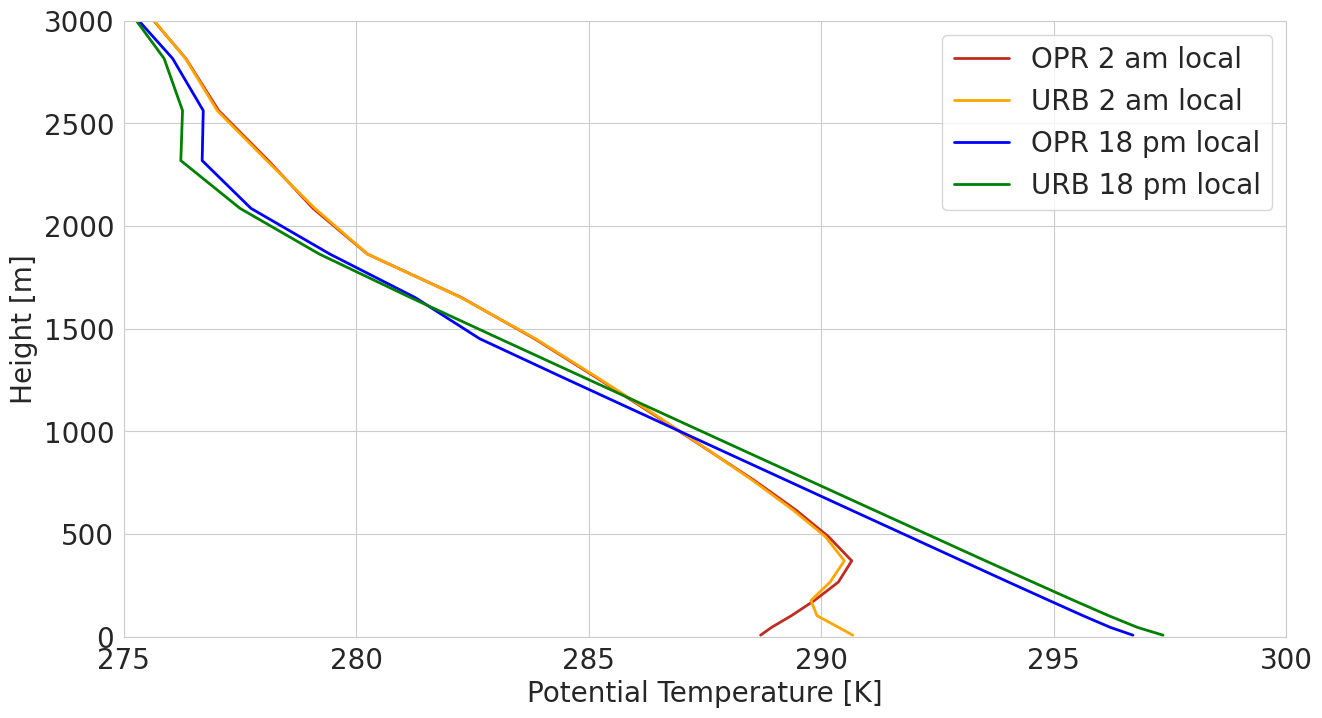

In [14]:
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(ds['OPR22']['13'].T.isel(cell=74).values[0], height , label='OPR 2 am local', color='#BF2C23', lw = 2)
ax.plot(ds['URB22']['13'].T.isel(cell=74).values[0], height, label='URB 2 am local', color='orange', lw = 2)

ax.plot(ds['OPR22']['09'].T.isel(cell=74).values[0], height , label='OPR 18 pm local', color='blue', lw = 2)
ax.plot(ds['URB22']['09'].T.isel(cell=74).values[0], height, label='URB 18 pm local', color='green', lw = 2)

ax.grid(True)


ax.set_ylim(0, 3000)
ax.set_xlim(275, 300)


ax.set_ylabel('Height [m]')
ax.set_xlabel('Potential Temperature [K]')
plt.legend()